#Trending Youtube video data analytics
---
## Aim & Data summary 
The aim of this project is to explore interesting trends and correlations that can be found about videos that went "Trending " on Youtube, in order to generate hypotheses that could help in understanding the platform better.  
We did this by exploring a publicly available [dataset](https://www.kaggle.com/datasnaek/youtube-new) with data about trending videos at the time of being listed as "trending". Columns include:
- Dates: Trending date, Publish time
- Strings: Title, Channel name, Tags
- Numerical counts: Views, Likes, Dislikes, Comment count
- Boolean: Comments disabled, ratings disabled, video error/removal  
Data was provided for 10 different countries in 10 csv files. We compiled the data into a single file, with the country as one of the columns, thus adding a variable for analysis.  

## Dataframe  
Here is an overview of the dataframe generated from the data:

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from scripts import project_functions
import importlib as imp
from pylab import savefig
imp.reload(project_functions)
df = project_functions.load_and_process("../../data/raw/")
print(df)

int64
object
       trending_date                                              title  \
0           17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1           17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2           17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3           17.14.11                           I Dare You: GOING BALD!?   
4           17.14.11        Ed Sheeran - Perfect (Official Music Video)   
...              ...                                                ...   
375936      18.14.06  BTS Plays With Puppies While Answering Fan Que...   
375937      18.14.06                       The Cat Who Caught the Laser   
375939      18.14.06  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
375940      18.14.06                How Black Panther Should Have Ended   
375941      18.14.06  Official Call of Duty®: Black Ops 4 — Multipla...   

                   channel_title       category_id              publish_time  \
0     

It can be seen that 330259 rows in total are included in this analyis, from a dataset that claims to include all videos that went trending within the 2017-2019 period.  
## EDA  
In order to have an overview of the data, the ProfileReport module was used. An HTML file containing the overview was generated which aided in guiding the exploratory process.  
From this report we made the interesting observations : 
- Videos can be listed multiple times. "This is America" by Childish Gambino was listed 92 times.
    Also, not all categories have an equal number or videos. 'Entertainment' has the most, with 100481 videos.
    I think I will try and do analyses and plots by category, because It seems that the "stats" may differ based on them.
- A lot of the distributions are heavily skewed (Likes, dislikes, views, comment count) to the left. 
- Number of videos seems to not differ a lot by country. This is useful since, I may want to make comparisons by country and it matters that they have similar sample sizes. 


In [167]:
from pandas_profiling import ProfileReport
overview = ProfileReport(df)
overview.to_file(output_file='overview2.html')

Click [here](guilherme(durvan)/overview2.html) to access the profile report.

We used seaborn to make a bar plot so that we could see with more detail the number of views when videos go trending on Youtube in different countries:

Text(0, 0.5, 'Country')

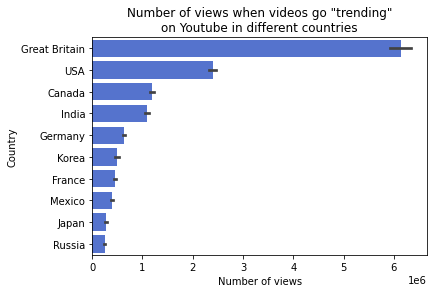

In [158]:
p1 = sns.barplot(y=df['Country'],x=df['views'], color = "royalblue", order = ["Great Britain","USA","Canada","India","Germany","Korea","France","Mexico","Japan","Russia"]).set_title("Number of views when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of views")
plot.ylabel("Country")

From the plot above we noticed that the number of views videos have when listed as "Trending" could differ widely between countries. 
Videos in Great Britain have a much higher mean number of views when listed as trending, compared to all the other countries in the dataset. USA, Canada and India follow Great Britain, with much smaller numbers.

We wonder if the countries with a higher number of views when videos are listed as trending will also have a higher number of likes and dislikes, since we saw in the Profile Report likes and dislikes have some correlation with views.

To look into it with more detail we plotted bar graphs for likes, and dislikes.

Text(0, 0.5, 'Country')

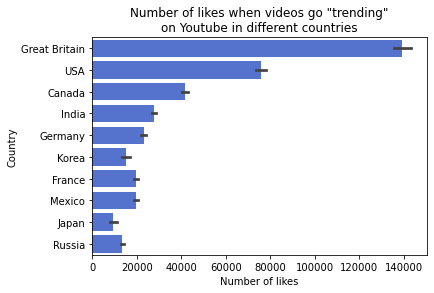

In [159]:
p2 = sns.barplot(y=df['Country'],x=df['likes'], color= 'royalblue',  order = ["Great Britain","USA","Canada","India","Germany","Korea","France","Mexico","Japan","Russia"]).set_title("Number of likes when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of likes")
plot.ylabel("Country")

From this bar chart, in the same order as the plot for number of views, we can see that the same countries where videos have a higher number of views when listed as "trending" tend to have videos with higher counts of likes, which is consistent with the correlogram seen in the Profile Report.

Text(0, 0.5, 'Country')

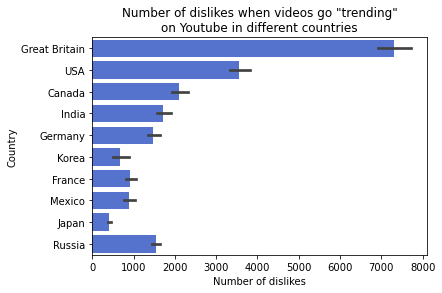

In [160]:
p3 = sns.barplot(y=df['Country'],x=df['dislikes'], color="royalblue",  order = ["Great Britain","USA","Canada","India","Germany","Korea","France","Mexico","Japan","Russia"]).set_title("Number of dislikes when videos go \"trending\"\non Youtube in different countries")
plot.xlabel("Number of dislikes")
plot.ylabel("Country")

From this plot we can see a similar pattern for number of dislikes. 
Interestingly, Russia and Korea are the exceptions, off-pattern, in both this plot and the previous plot.  
Having seen differences in views, likes and dislikes in videos trending in different countries, we wonder if there are differences in views between categories. We visualized this in the following plot:


Text(0, 0.5, 'Video category')

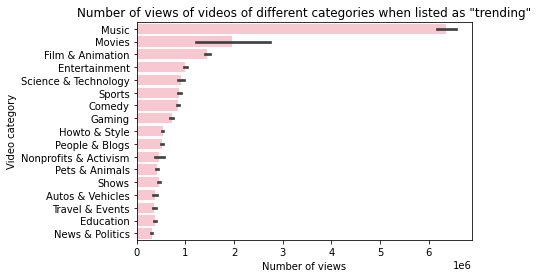

In [161]:
p7 = sns.barplot(y=df['category_id'],x=df['views'], color = 'pink', order=['Music','Movies','Film & Animation','Entertainment','Science & Technology','Sports','Comedy','Gaming','Howto & Style','People & Blogs','Nonprofits & Activism','Pets & Animals','Shows','Autos & Vehicles','Travel & Events','Education','News & Politics']).set_title("Number of views of videos of different categories when listed as \"trending\"")
plot.xlabel("Number of views")
plot.ylabel("Video category")

This plot shows that the Music category accounts for the largest share of the views, followed by the 'Movies' category, which has the largest variation, and the 'Film & Animation' category. This shows that videos trending in the Movies category tend to vary a lot in the number of views compared to videos in the other categories.  
Videos in the 'News & Politics' category tend to have the least number of views when they are listed as 'trending'.  
This means that videos in different categories are listed as "trending" with different number of views, suggesting that there are other factors that determine whether a video is listed as "trending" other than just the number of views.

## Research Question 1 : Does the yield of likes and dislikes per view on Youtube differ between trending video categories across countries?  

From our EDA we saw that the number of views in videos listed as "trending" differs across countries and video categories.
We also saw that likes and dislikes follow a similar pattern as the number of views, which is consistent with the profile report. Now we ask how the likes and dislikes *per view* will differ or not, between categories and countries.  

### Dataset  

This analysis involves numerical and categorical data.  

The numeric columns used are "views","likes" and "dislikes", which indicate counts of views, likes and dislikes for each video at the time of listing as "trending" on Youtube. Additional columns ("LPV" and "dLPV") were computed to indicate number of likes and dislikes per view, respectively.  

The categorical columns used are "Country" and "category_id", which indicate 10 different countries with separate "trending" lists, and 17 different categories of videos, respectively.  

### Analysis method  

This research question was answered by plotting bar graphs, both individually and in panels, when necessary. This choice is motivated by the type of data in each plot and the relationships in question (numerical and categorical). Bar plots allowed the data to be visualized in clearly, without relying on few subjective elements such as colour gradients. Ascending/Descending patterns could also be compared across different plots by sorting the bars based on length.

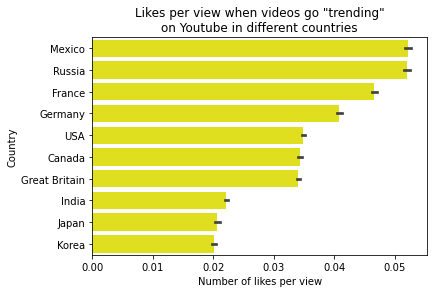

In [162]:
df['LPV']=df['likes']/df['views']
df['LPV'].fillna(0)
p4 = sns.barplot(y=df['Country'],x=df['LPV'],color="yellow", order=['Mexico','Russia','France','Germany','USA','Canada','Great Britain','India','Japan','Korea']).set_title("Likes per view when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of likes per view")
plot.savefig('../../images/LPVcs.png')

This figure shows that likes per view when videos become trending can differ between countries. Videos trending in India,Japan and Korea have the lowest number of Likes per view, whereas Russia and Mexico have the highest. Actually, Videos trending in Russia and Mexico have a similar number of likes per view, as seen by the length of the bars and similar standard error interval. Interestingly, the English-speaking countries (Canada, USA, Great Britain) have a similar number of likes per view.  

From this plot it can also be seen that the probability of a viewer clicking "like" on a video varies between 2% to 5% in the 10 differemt countries in this analysis, for videos listed as "Trending".  

Since viewer reaction (likes, dislikes, comments) are relevant to a Youtuber's income from their videos, the number of likes per view can also be representative of how much income can be generated from each viewer.
dislikes per view were computed and plotted too:

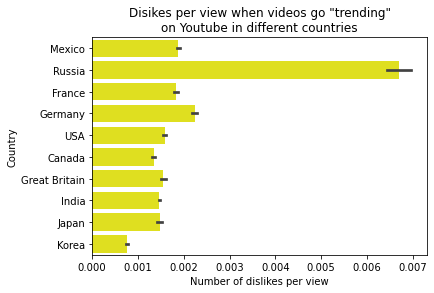

In [163]:
df['DLPV']=df['dislikes']/df['views']
df['DLPV'].fillna(0)
p5 = sns.barplot(y=df['Country'],x=df['DLPV'],color="yellow",order=['Mexico','Russia','France','Germany','USA','Canada','Great Britain','India','Japan','Korea']).set_title("Disikes per view when videos go \"trending\"\non Youtube in different countries" )
plot.xlabel("Number of dislikes per view")
plot.savefig('../../images/dLPVcs.png')

In this graph it is striking how high the dislikes per view in videos trending in Russia is compared to the other countries. Howewer, this graph is on a different scale from the previous one, so dislikes per view tend to be lower by an order of magnitude than Likes per views. 
This means that in "trending" videos, across all countries, viewers are far more likely to "like" a video than to "dislike" it.
Korea has the least dislikes per view in this dataset, meaning that viewers of videos that that become "trending" in Korea are the least likely to click "dislike", as opposed to viewers of videos that become "trending" in Russia, who are 7 times more likely to click "dislike".  

Both likes per view and dislikes per view can vary with location, however differences in dislikes per view are less pronounced throughout countries than differences in likes per view, with the exception of Russia. From this figure it can be deduced that the likelihood of a viewer of a viewer clicking "dislike" on a video varies betweeen <0.1% and 0.7% in different countries, with 0.1%-0.2% being more frequent across the countries in this analysis, for videos that are listed as "trending". This probability is much smaller than the probability of likes per view (2% to 5%).  

Countries are sorted in the same order as the previous figure, with the country of highest likes per view on top. In this figure, the ascending order of the bars is not conserved nor inverted, so there is no apparent pattern between likes per view and dislikes per view. 
In order to explore deeper, the LPV and dLPV for each categore were visualized, at first in all countries in the analysis:

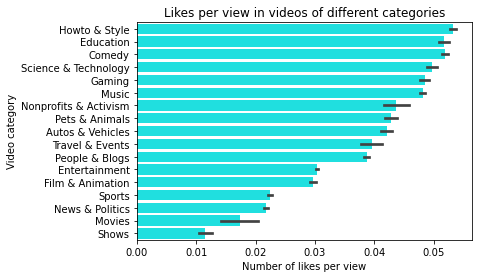

In [164]:
p6 = sns.barplot(y=df['category_id'],x=df['LPV'],color="cyan", order=['Howto & Style','Education','Comedy','Science & Technology','Gaming','Music','Nonprofits & Activism','Pets & Animals','Autos & Vehicles','Travel & Events','People & Blogs','Entertainment','Film & Animation','Sports','News & Politics','Movies','Shows']).set_title("Likes per view in videos of different categories")
plot.xlabel("Number of likes per view")
plot.ylabel("Video category")
plot.savefig('../../images/LPVcats.png')

This figure shows that different categories of videos in this dataset can differ in the likes per view too. videos about Shows, Movies, News & Politics, and Sports have the least likes per view, whereas videos in the HowTo & Style, Education, and Comedy categories earn the highest number of likes per view.  

Not all categories differ from each other in likes per view; for instance, videos about Education and Comedy have similar numbes of likes per video and fall within each other's standard errors of the mean. This is true for videos about Gaming and Music, Pets & Animals and Autos & Vehicles as well.  

To see what the pattern looked like for dislikes per view and if categories with highest likes per view would have lowest dislikes per views, and vice-versa, a similar plot was made for dislikes per view per category.

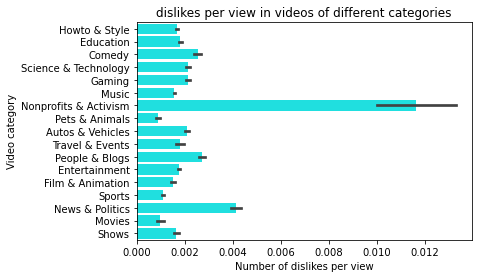

In [165]:
p8 = sns.barplot(y=df['category_id'],x=df['DLPV'],color="cyan",order=['Howto & Style','Education','Comedy','Science & Technology','Gaming','Music','Nonprofits & Activism','Pets & Animals','Autos & Vehicles','Travel & Events','People & Blogs','Entertainment','Film & Animation','Sports','News & Politics','Movies','Shows']).set_title("dislikes per view in videos of different categories")
plot.xlabel("Number of dislikes per view")
plot.ylabel("Video category")
plot.savefig('../../images/dLPVcats.png')

This figure shows a different pattern from the likes per view plot. The dislikes per view are smaller by an order of magnitude, which is consistent with what was obsered in when likes per view were plotted per country. Videos in the "Nonprofits & Activism" category have the most dislikes per view as well as the most variation. Following, with ~3 times less dislikes per view, are videos in the "News and Politics" category. In contrast, videos about Pets & Animals are shown to receive the least dislikes per view.  

This plot was sorted in the same order as the plot made for likes per view, and the ascending order is not conserved nor inverted, so no relationship betweem likes per view and dislikes per view is suggested.  

In order to see how the distrbution of likes and dislikes per view would differ between countries, Canada, Great Britain, Russia, and the USA were selected as countries of interest. Similar bar plots were plotted for those countries, thus combining the analysis by category and by country.

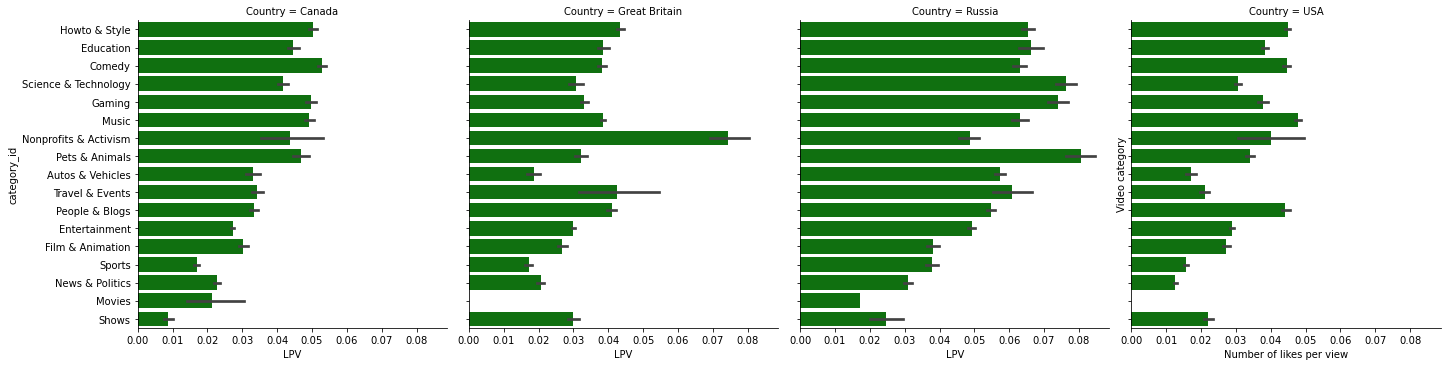

In [166]:
#dfCUB = df.loc[(df['Country']=="Canada")| (df['Country']=="USA") | (df['Country']=="Great Britain") | (df['Country']=="Russia")]
P9 = sns.catplot(data=dfCUB,col='Country',y='category_id',x='LPV',kind='bar',color = 'green',order=['Howto & Style','Education','Comedy','Science & Technology','Gaming','Music','Nonprofits & Activism','Pets & Animals','Autos & Vehicles','Travel & Events','People & Blogs','Entertainment','Film & Animation','Sports','News & Politics','Movies','Shows'])
plot.ylabel("Video category")
plot.xlabel("Number of likes per view")
plot.savefig("../../images/LPVcatscs.png")

From these plots we can see that the number of likes per view per video category can differ between the 4 countries above (Canada, Great Britain, Russia, USA). The categories with the highest amount of likes per are different for each country. 

In Canada videos in the "Comedy","Gaming", and "Music" categories receive more likes per view; In Great Britain videos in the "Nonprofits & Activism category" receive almost two times the number of likes per video than most other categories; In Russia the number of likes per video tend to be higher, and videos in the "Pets & Animals", "Science & Technology", and "Gaming" categories have the highet number of likes per view.  

Interestingly, videos in the "Movies" category have the least number of likes per view (0) in Great Britain and in the USA.

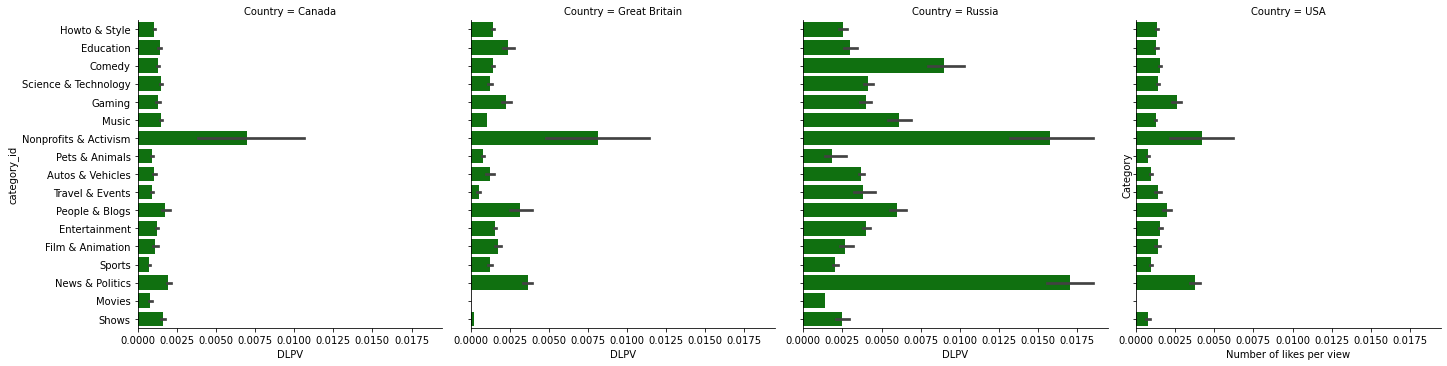

In [149]:
dfCUB = df.loc[(df['Country']=="CA")| (df['Country']=="US") | (df['Country']=="GB") | (df['Country']=="RU")]
P10 = sns.catplot(data=dfCUB,col='Country',y='category_id',x='DLPV',kind='bar',color = 'green',order=['Howto & Style','Education','Comedy','Science & Technology','Gaming','Music','Nonprofits & Activism','Pets & Animals','Autos & Vehicles','Travel & Events','People & Blogs','Entertainment','Film & Animation','Sports','News & Politics','Movies','Shows'])
plot.ylabel("Video category")
plot.xlabel("Number of dislikes per view")
plot.savefig("../../images/dLPVcatscs.png")

This figure shows a few categories with a much higher number of dislikes per view than the others. In Canada, videos in the "Nonprofits & Activism" category yield the highest number of dislikes per view, with the largest variation. This is true in Great Britain as well, where the "Movies" category has the lowest (0) number of dislikes per view. In Russia, the number of dislikes per views tend to be higher,with videos in the "News & Politics", "Nonprofits & Activism", "Science & Technology" receiving the largest number of dislikes per video, with large variability. In the USA, the difference between the categories with the largest number of dilikes per video and the remaining categories is less pronounced. Videos in the "Nonprofits & Activism" and "News & Politics" categories receive the most dislikes per view in the USA. Videos in the "Movies" category receive the least dislikes per view (0), in the USA, similarly to Great Britain. This is also true for the number of likes per video, as seen in the previous plot.

This suggests that viewers of videos in the "Movies" category that are eventually listed as "trending" in the USA and Great Britain are very unlikely to react to them by cliking on "like" or "dislike".  

Consistently with the previous figures, the number of dislikes per view is an order of magnitude lower than the number of likes per view, thus, viewers are far more likely to click on "like" than "dislike" for all categories, in all 4 countries.  


**Does the yield of likes and dislikes per view on Youtube differ between trending video categories across countries?**  

The yields of likes and dislikes per view on Youtube differs between video categories across all 10 countries, as well as between the 10 countries. However, Not all categories have a distinct number of likes/dislikes per view, and differences in likes per view tend to be more pronounced than differences in dislikes per view, for most categories.

## Research Question 2 - Is video engagement (likes + dislikes + comments + views) related to title length?

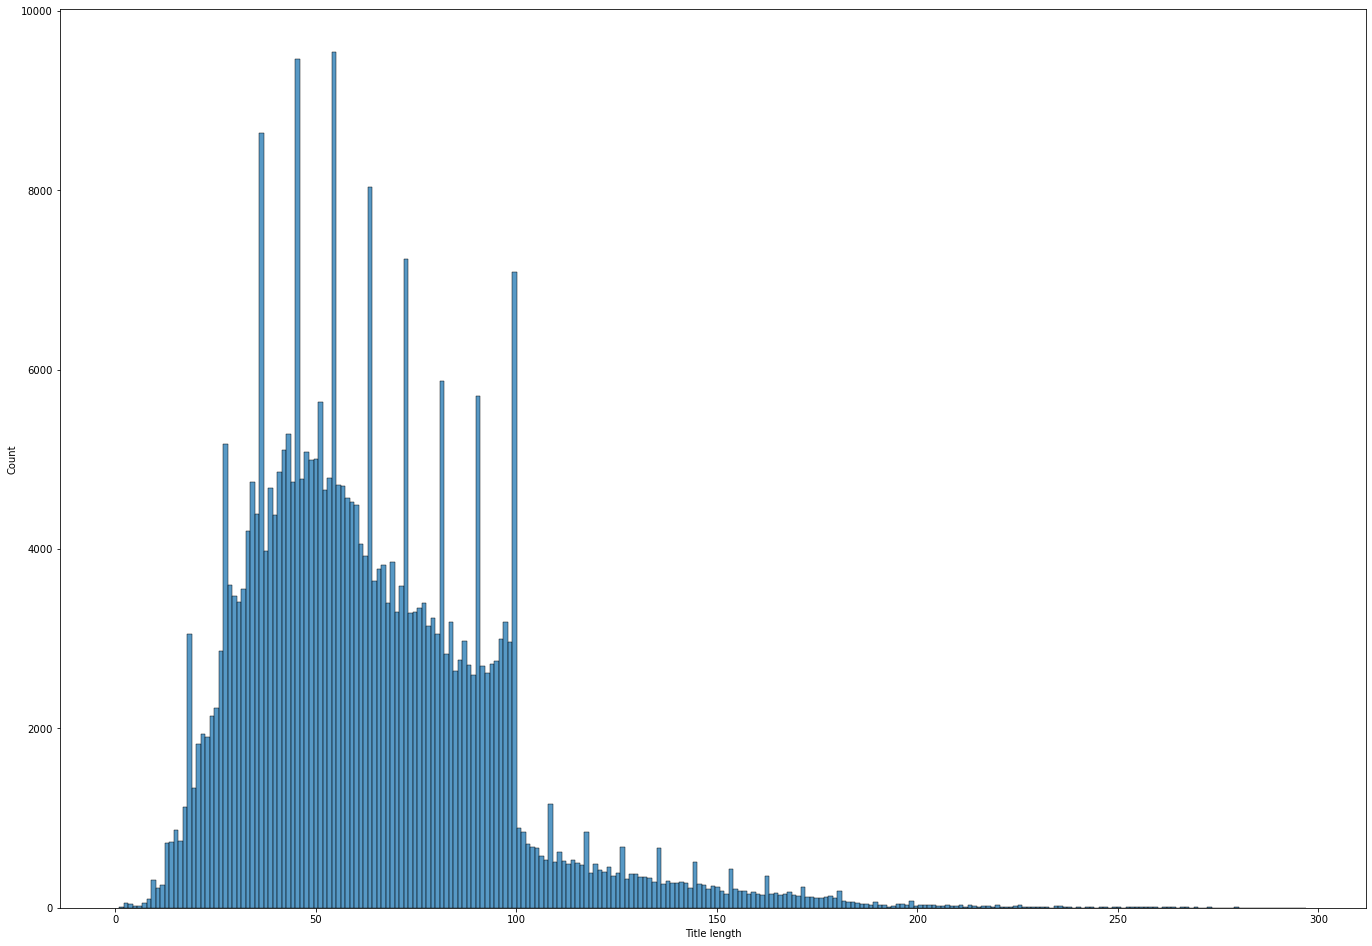

In [170]:
#p12=df['Title length'].plot(kind='kde')
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.histplot(data=df,x=df['Title length'])

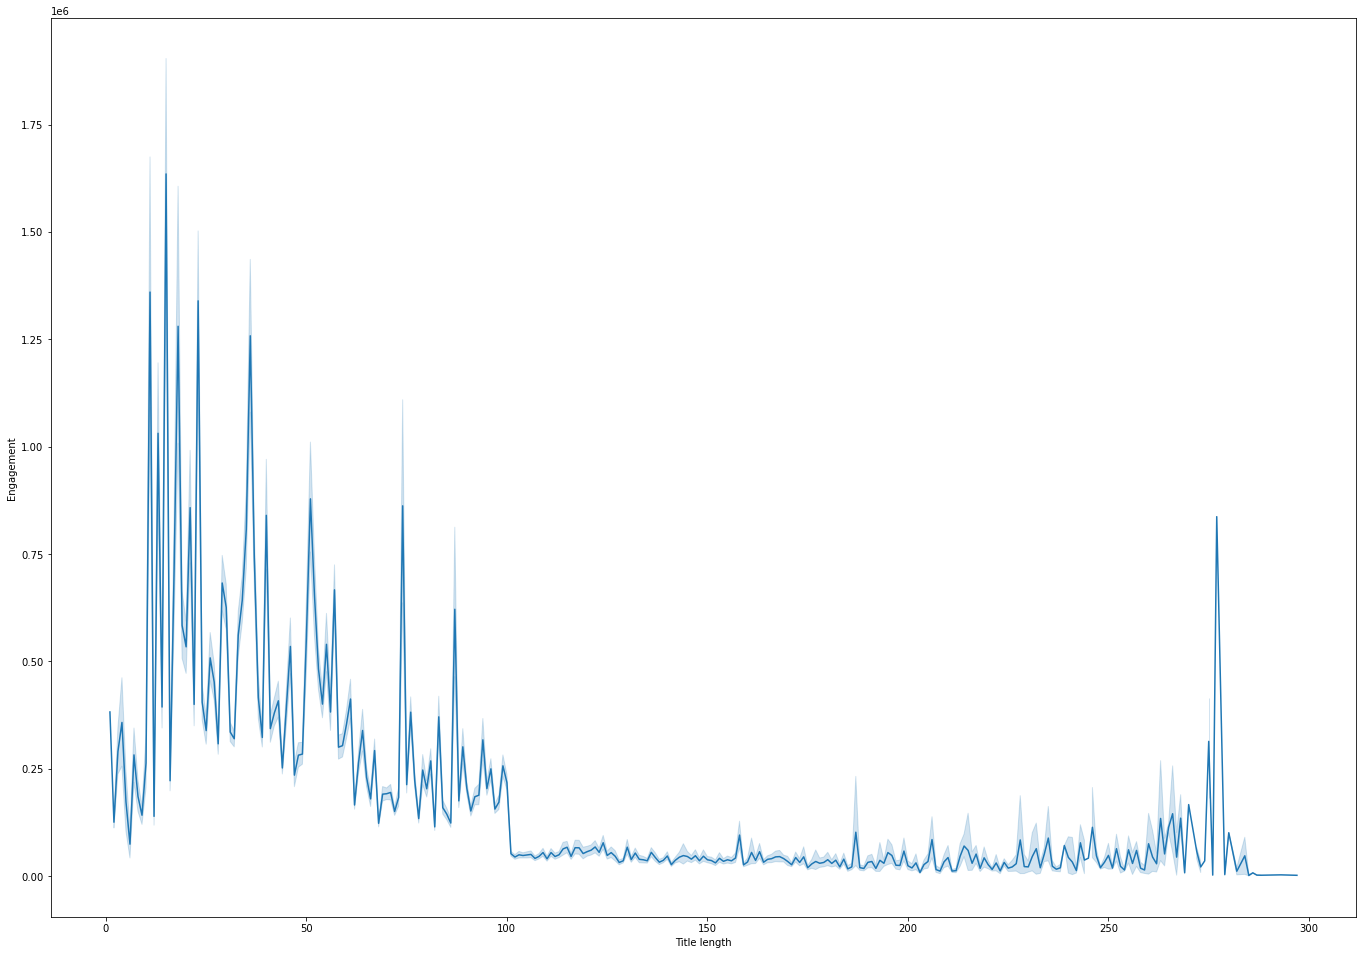

In [132]:
df['Engagement'] = (df['likes']+df['dislikes']+df['comment_count']+df['views']) 
#df['Title length'] = map(len,df['title'])
#print(df)
#for i in range(len(df['Engagement'])):
#    df.iloc[i, 16] = len(df.iloc[i, 1])
#print(df)
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['Engagement'])


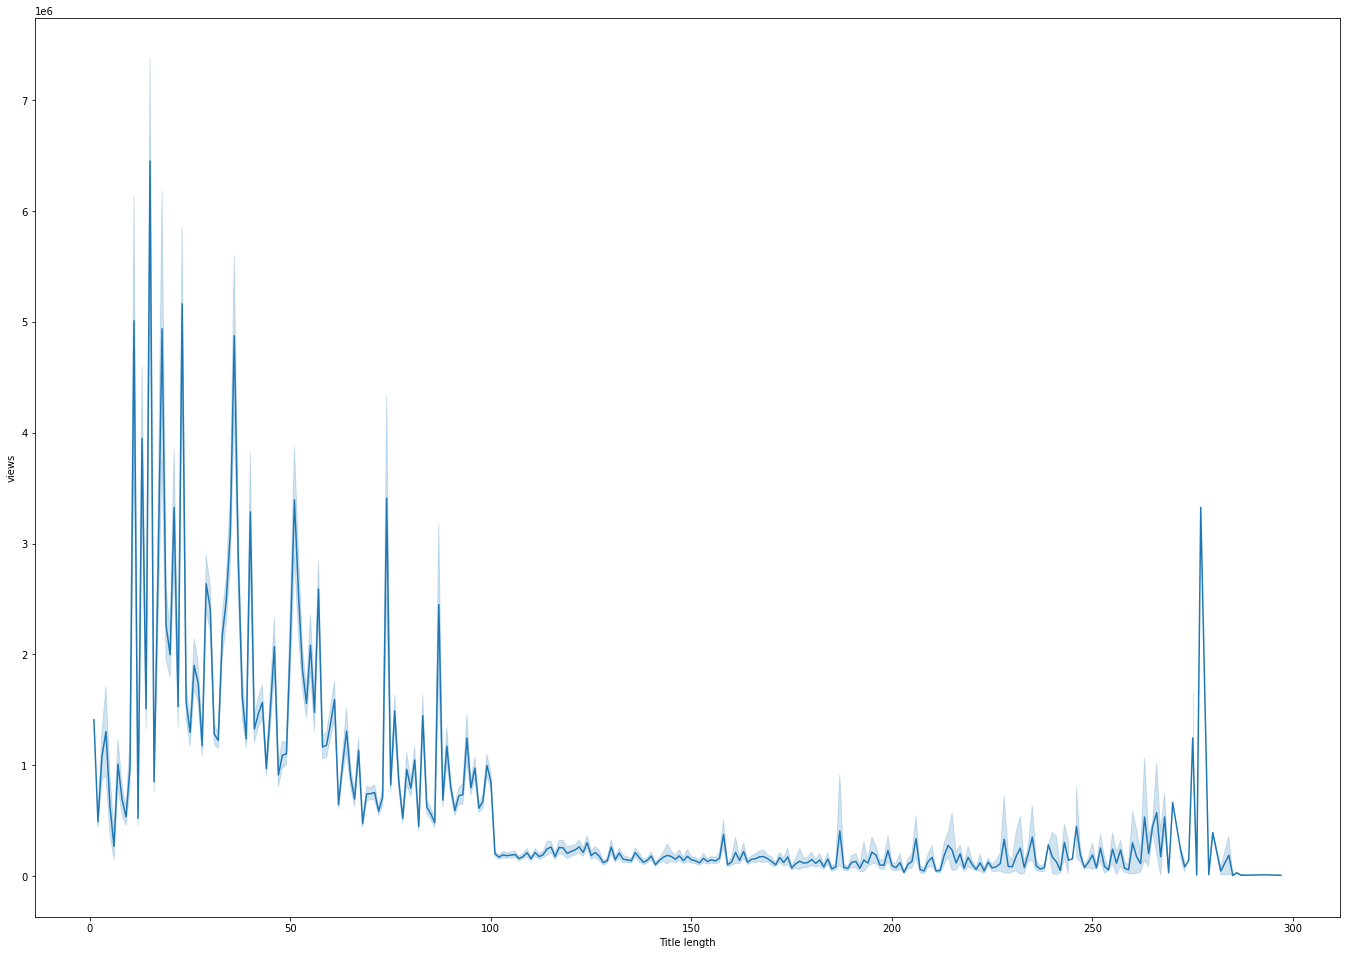

In [133]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['views'])


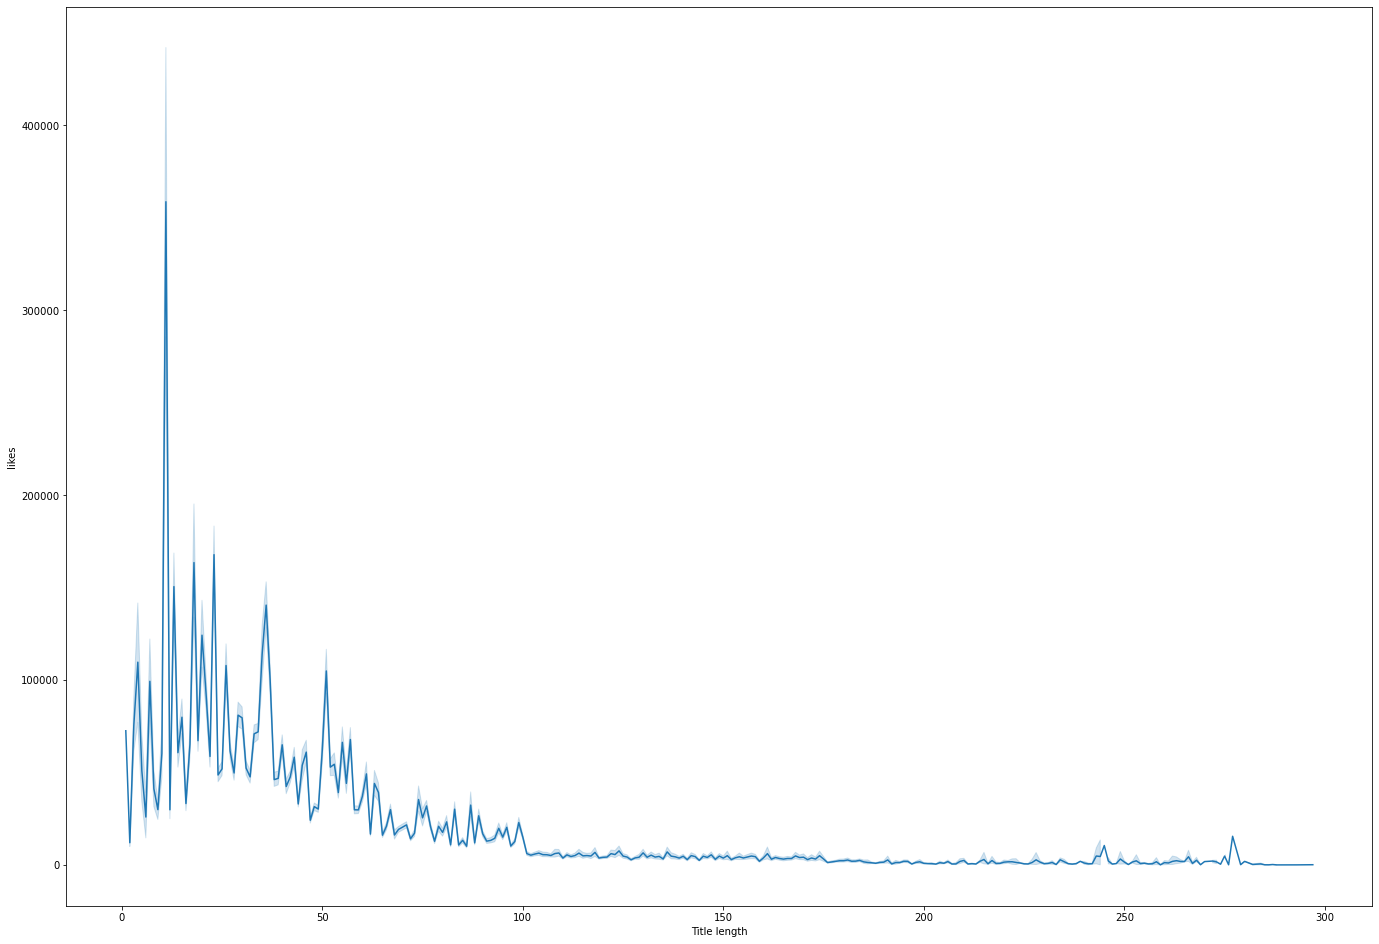

In [134]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['likes'])


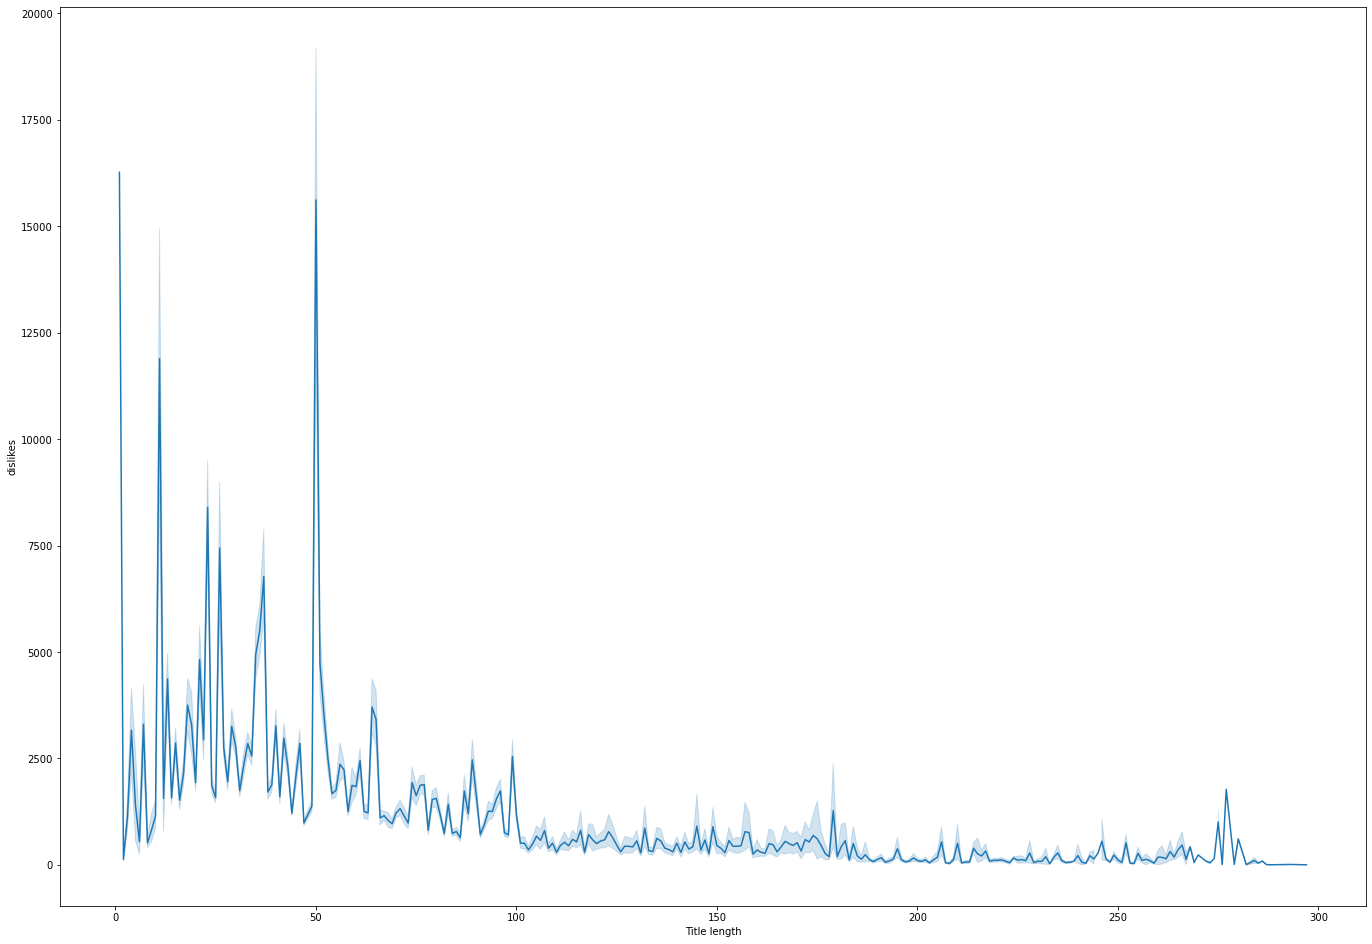

In [135]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['dislikes'])

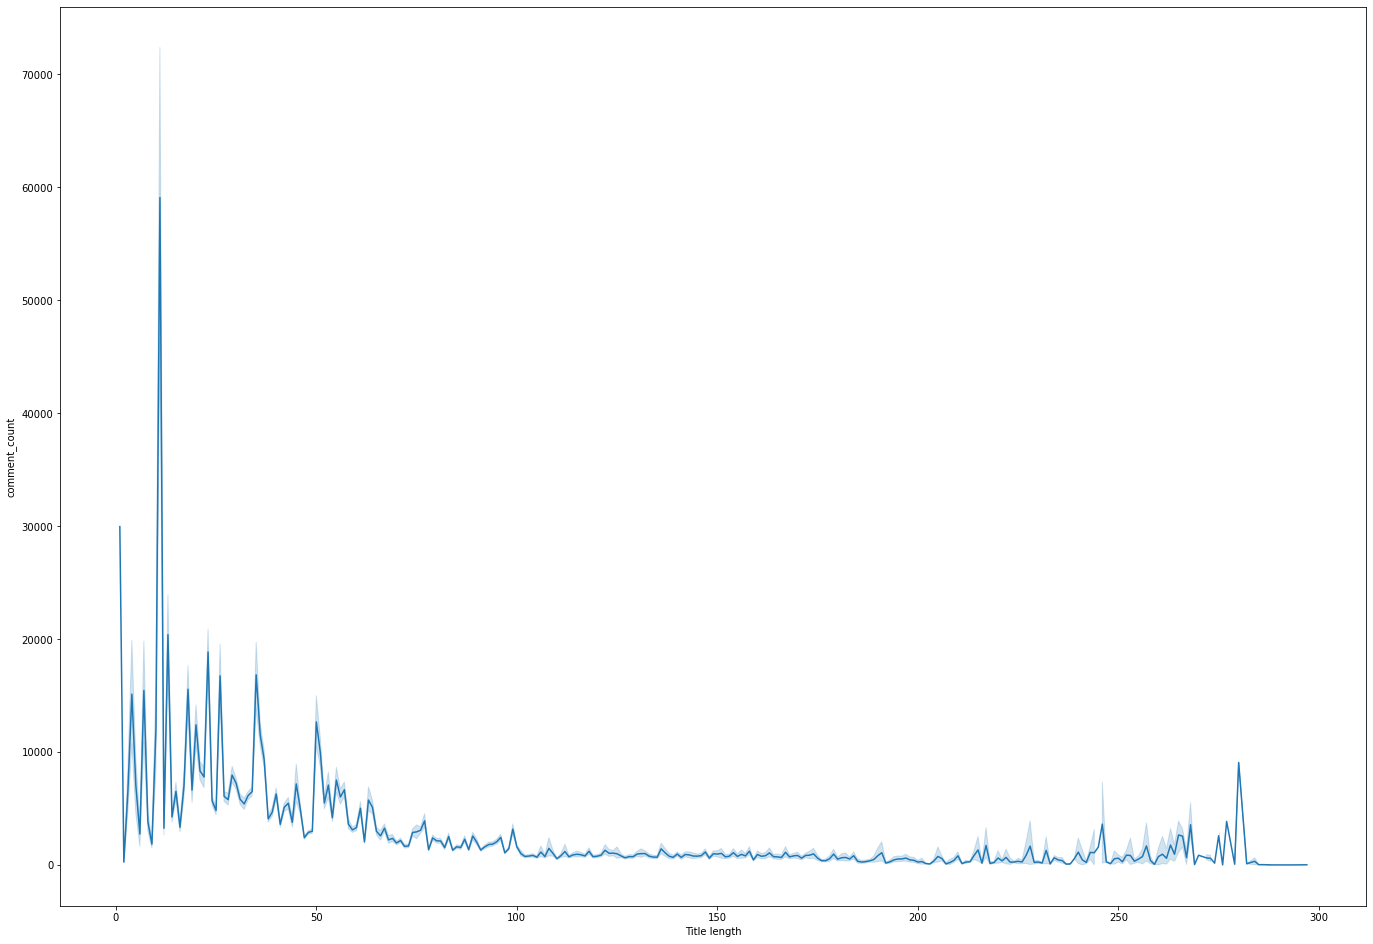

In [136]:
fig, ax = plot.subplots()
fig.set_size_inches(23.4, 16.54)
p11=sns.lineplot(data=df,x=df['Title length'],y=df['comment_count'])